In [1]:
# Importing Libraries

# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Statistics & Mathematics
import scipy.stats as stats
from scipy.stats import shapiro, skew
import math

from sklearn.feature_selection import RFECV

# Machine Learning Pipeline & process
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Preprocessing data
from sklearn.preprocessing import RobustScaler, StandardScaler, QuantileTransformer, FunctionTransformer

from sklearn.compose import ColumnTransformer

# Model Selection for Cross Validation
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split

# Machine Learning metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, cohen_kappa_score, make_scorer

# ML regressors
from sklearn.linear_model import HuberRegressor,RANSACRegressor, TheilSenRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, StackingRegressor, AdaBoostRegressor, RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor

# ML classifiers
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

from sklearn.cluster import KMeans

#import optuna
import optuna
import random

# Encoder of categorical variables
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Hiding warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Check the whole Data first
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2056.0,1027.500000,593.660397,0.00000,513.7500,1027.5000,1541.2500,2055.00000
fixed acidity,2056.0,8.365175,1.705390,5.00000,7.2000,7.9500,9.2000,15.90000
volatile acidity,2056.0,0.527601,0.173164,0.18000,0.3900,0.5200,0.6400,1.58000
citric acid,2056.0,0.265058,0.188267,0.00000,0.0900,0.2500,0.4200,0.76000
residual sugar,2056.0,2.398881,0.858824,1.20000,1.9000,2.2000,2.6000,14.00000
chlorides,2056.0,0.081856,0.023729,0.01200,0.0710,0.0790,0.0900,0.41400
free sulfur dioxide,2056.0,16.955982,10.009710,1.00000,8.0000,16.0000,24.0000,68.00000
total sulfur dioxide,2056.0,49.236868,32.961141,7.00000,22.0000,44.0000,65.0000,289.00000
density,2056.0,0.996748,0.001827,0.99007,0.9956,0.9967,0.9978,1.00369
pH,2056.0,3.310569,0.142321,2.74000,3.2000,3.3100,3.3900,3.78000


In [4]:
# See if there is any Null
train.isnull().sum()

Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
train.drop(columns = 'Id', inplace = True)

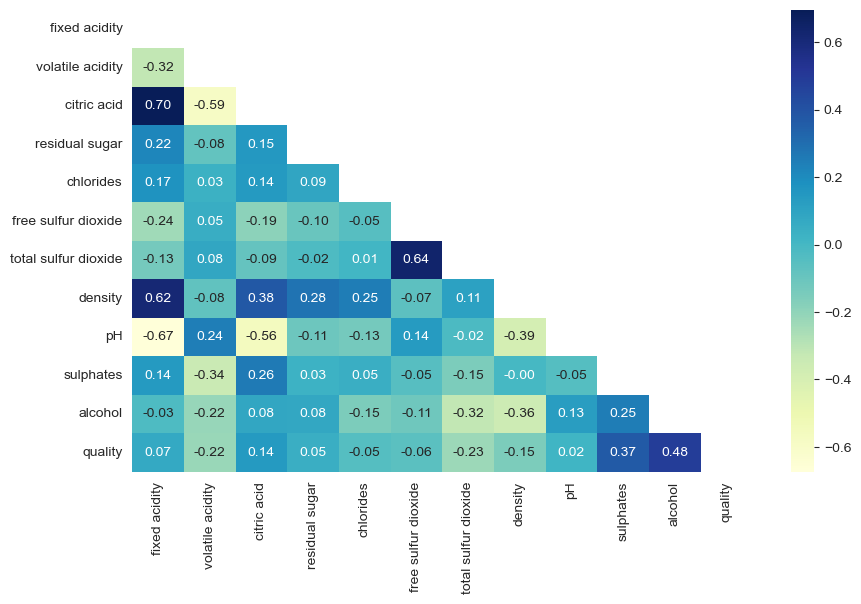

In [6]:
plt.figure(figsize = (10, 6))
matrix = train.corr()
mask = np.triu(np.ones_like(matrix), k = 0)
sns.heatmap(matrix, annot = True, fmt='.2f', mask = mask, cmap='YlGnBu')
plt.show()

In [7]:
def plot_histplot(df):
    num_cols = len(df.columns)
    num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))

    for i, column in enumerate(df.columns):
        row_index = i // 2
        col_index = i % 2
        ax = axes[row_index, col_index]

        sns.histplot(df[column], kde=True, bins = 30, ax=ax)
        ax.set_title(f'{column}', fontsize = 18)
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

    # If there is an odd number of columns, remove the empty subplot
    if num_cols % 2 != 0:
        fig.delaxes(axes[-1, -1])
    
    plt.tight_layout()
    plt.show()

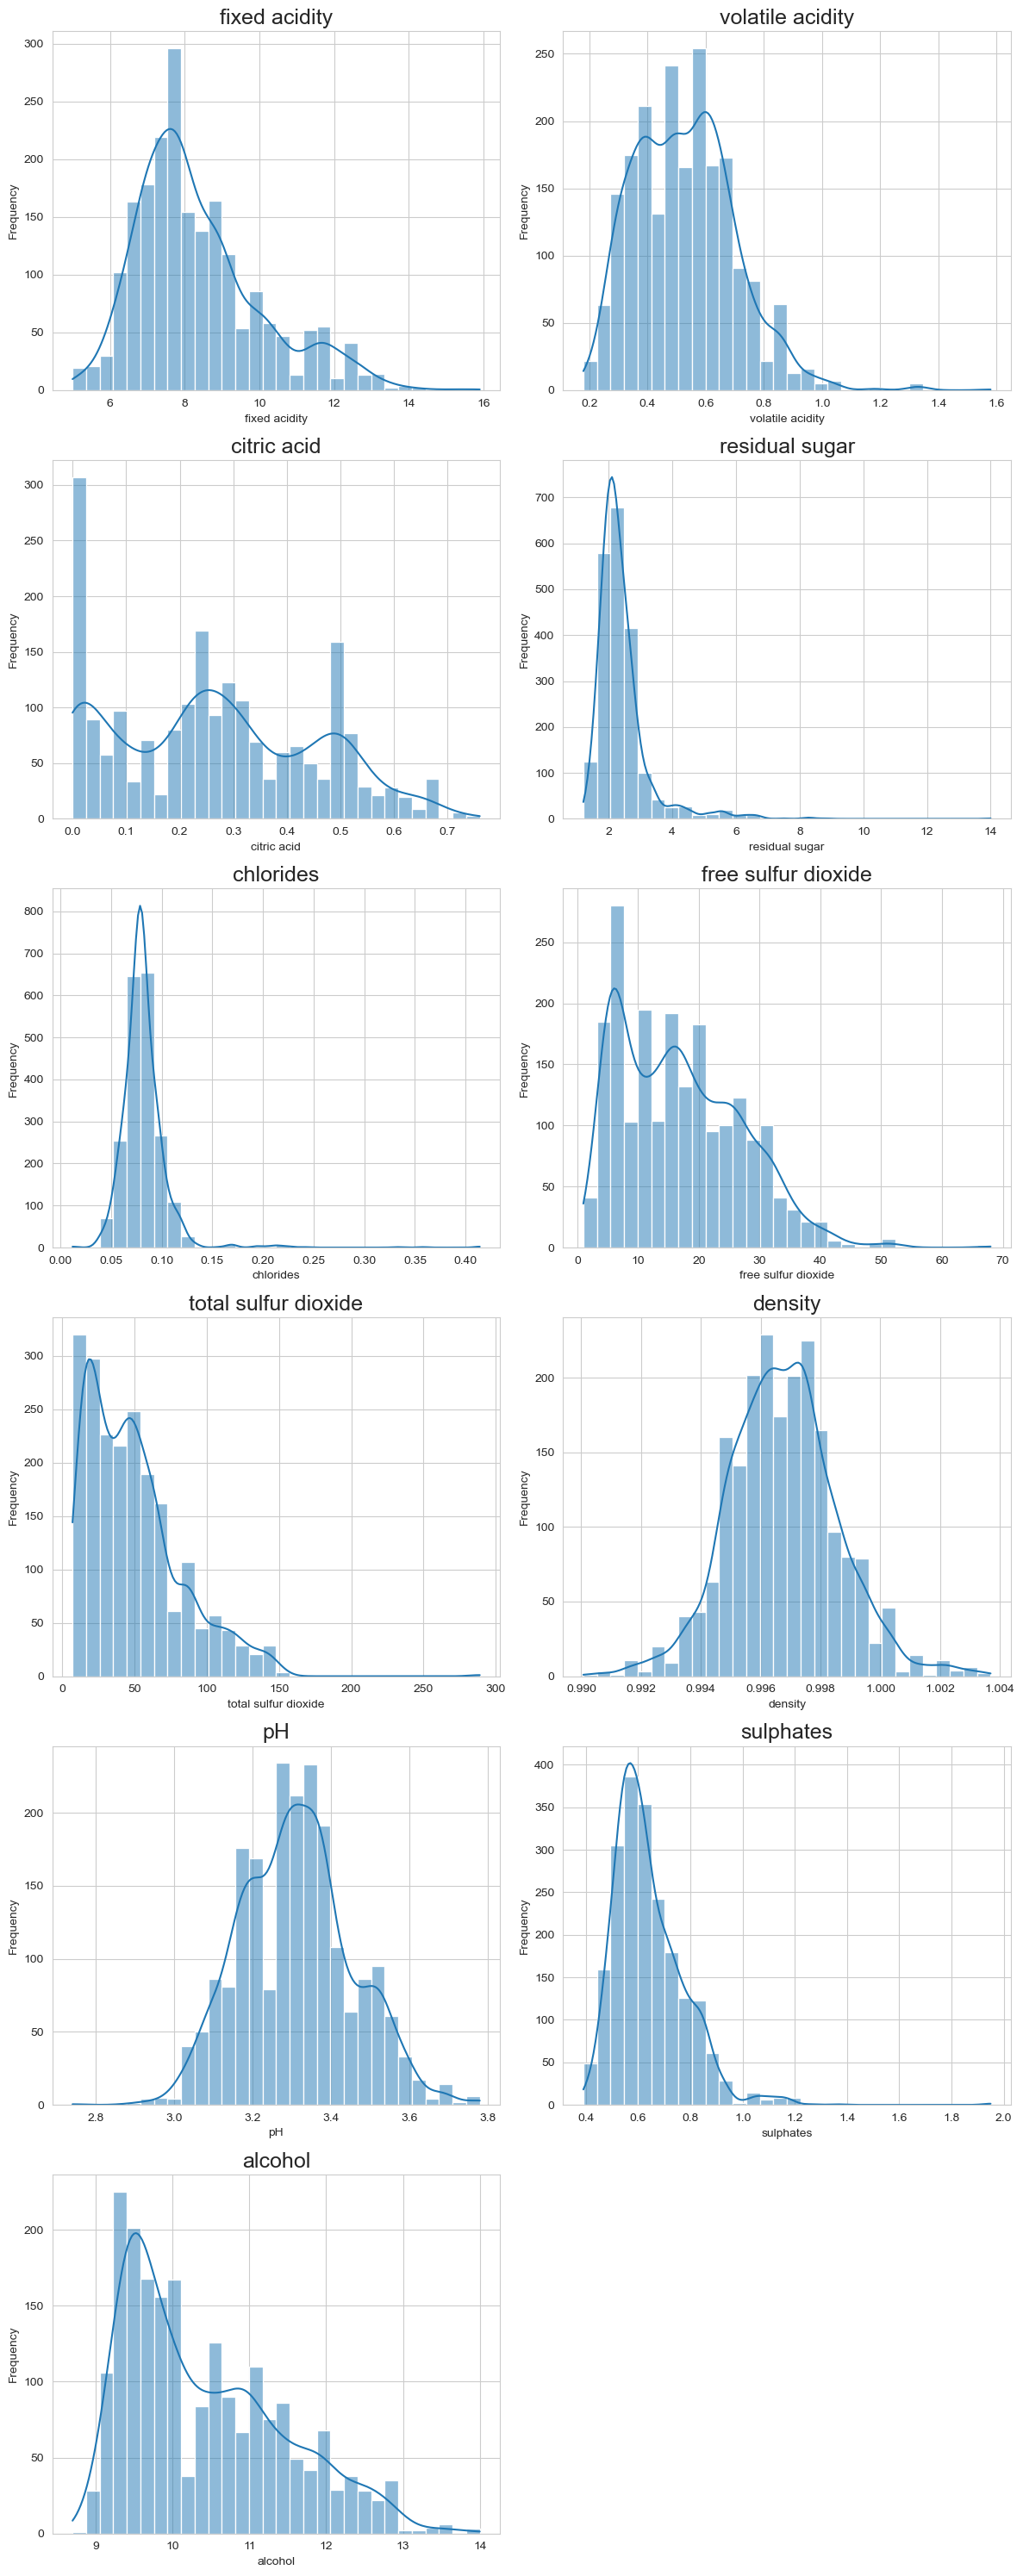

In [8]:
train2 = train.drop(columns = 'quality')
plot_histplot(train2)

In [9]:
def plot_boxplot(data):
    df = data.drop(columns='quality')
    num_cols = len(df.columns)
    num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed

    # Set up the figure and axes with Seaborn directly
    plt.figure(figsize=(12, num_rows * 5))

    for i, column in enumerate(df.columns):
        plt.subplot(num_rows, 2, i + 1)
        sns.boxplot(df[column], orient='h', color='skyblue')  # Adjust color as needed
        plt.title(f'{column}', fontsize=18)
        plt.xlabel(column)
        plt.ylabel('Values')

    # If there is an odd number of columns, remove the empty subplot
    if num_cols % 2 != 0:
        plt.delaxes(plt.subplot(num_rows, 2, num_cols + 1))

    plt.tight_layout()
    plt.show()

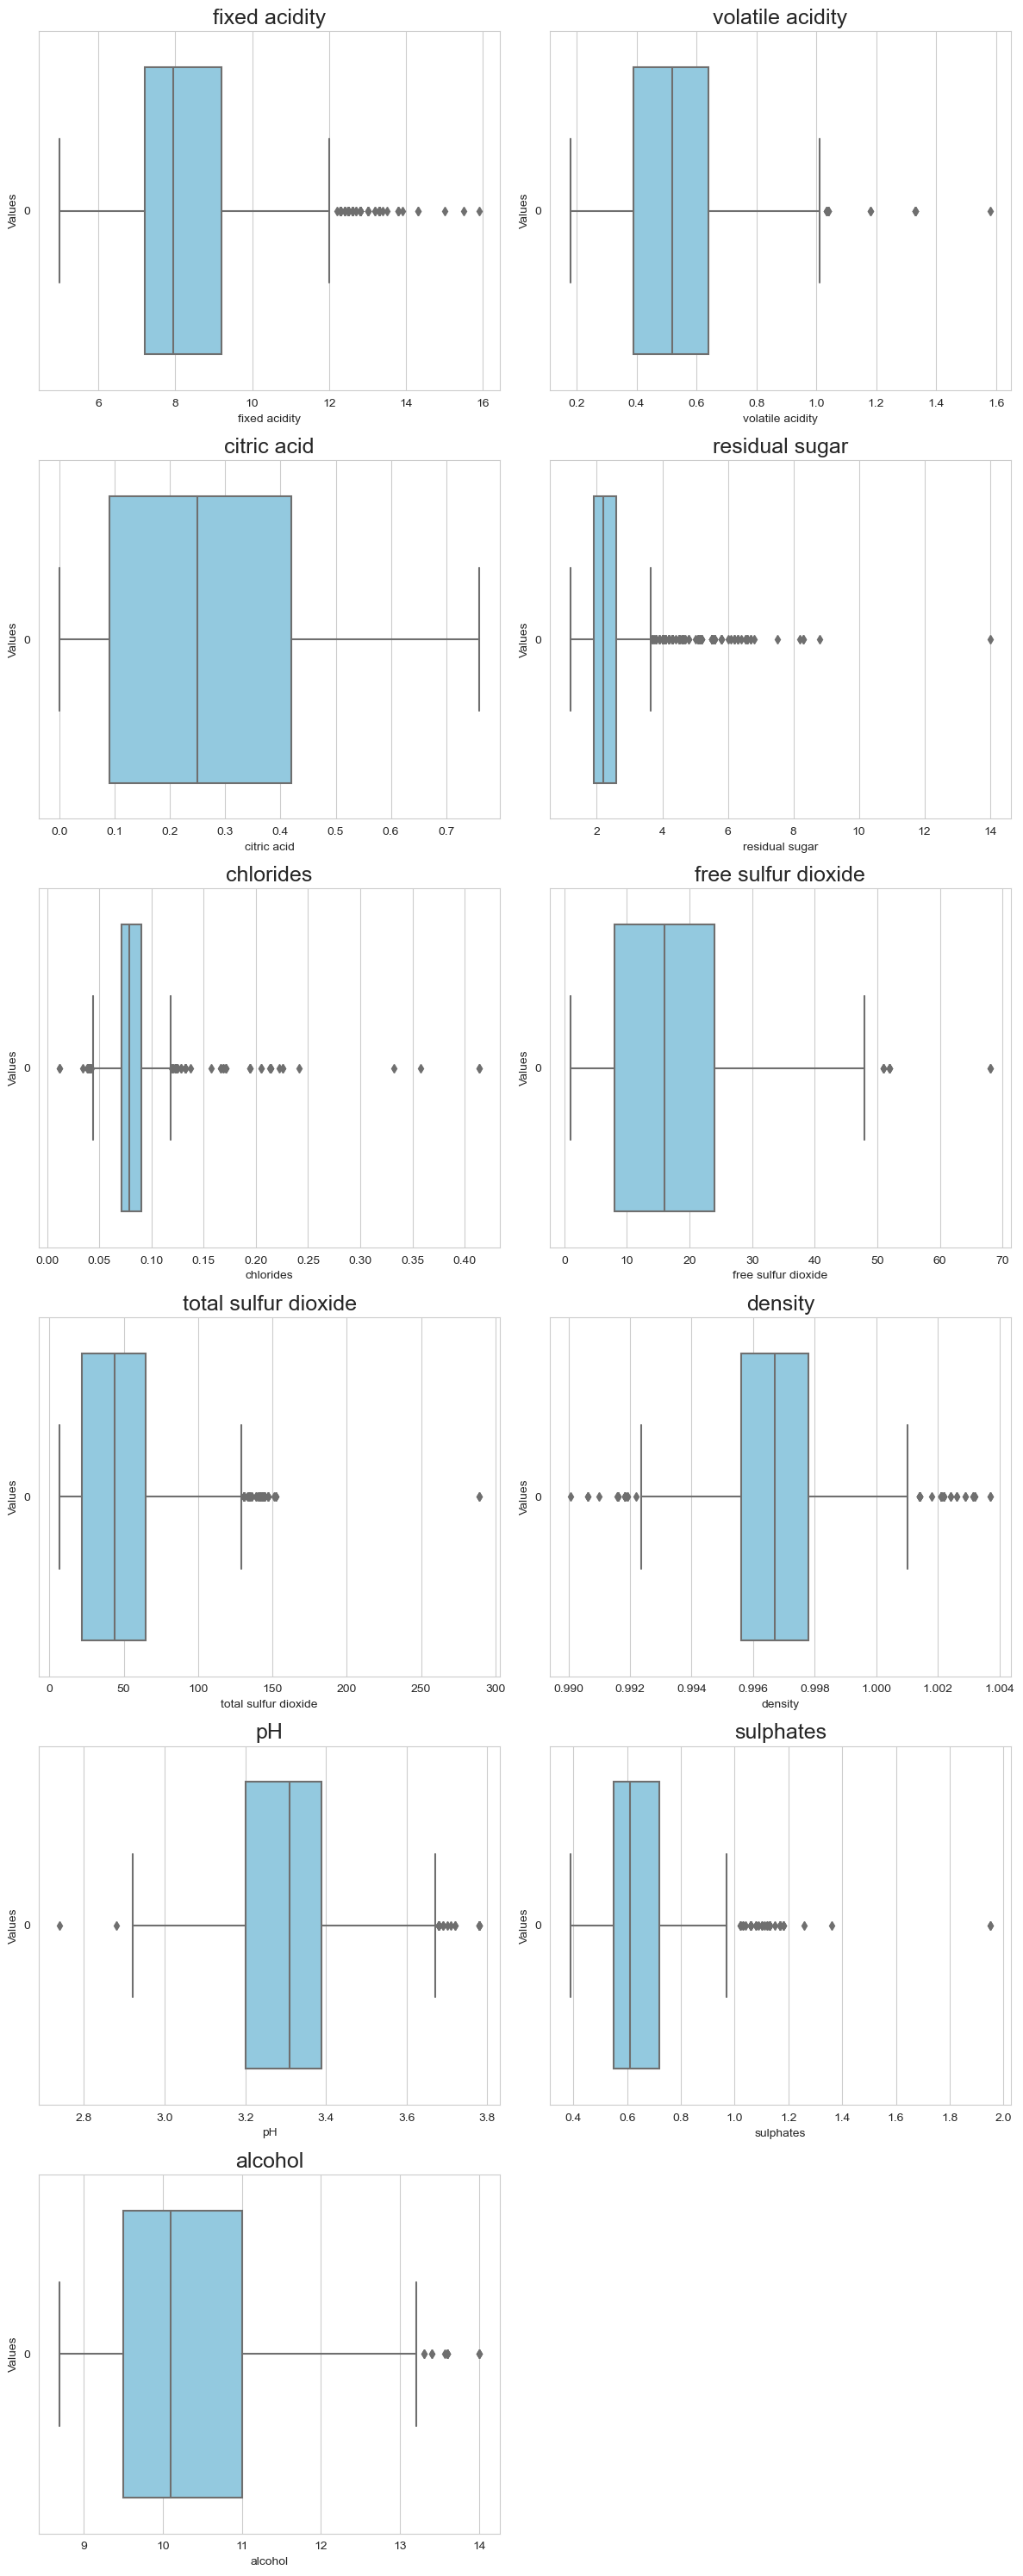

In [10]:
plot_boxplot(train)

#### Resource :https://medium.com/@insufficient/is-it-normal-the-shapiro-wilk-normality-test-b11febde04c9
#### Resource :https://www.kaggle.com/code/lusfernandotorres/wine-quality-eda-prediction-and-deploy/notebook

In [11]:
def shapiro_wilk_test(df):
    
    print(f'\n \033[1mShapiro-Wilk Test & Skewness:\033[0m')
    print('\n- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  \n')
    
    numeric_columns = df.select_dtypes(include=['float', 'int']).columns
    for feature in numeric_columns:
        stats, p_value = shapiro(df[feature])
        
        if p_value < 0.05:
            text = f'{feature} Does Not Seem to be Normally Distributed'
        else:
            text = f'{feature} Seems to be Normally Distributed'

        print(f'{feature}')
        print(f'\n  Shapiro-Wilk Statistic: {stats:.2f}')
        print(f'\n  Shapiro-Wilk P-value: {p_value}')
        print(f'\n  Skewness: {np.round(skew(df[feature]), 2)}')
        print(f'\n  Conclusion: {text}')
        print('\n=============================================================================================== \n')

    print('\n- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  \n')
    print(f'\033[1mEnd of Shapiro-Wilk Test\033[0m')

In [12]:
shapiro_wilk_test(train)


 Shapiro-Wilk Test & Skewness:

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

fixed acidity

  Shapiro-Wilk Statistic: 0.94

  Shapiro-Wilk P-value: 1.0431569635886352e-28

  Skewness: 0.96

  Conclusion: fixed acidity Does Not Seem to be Normally Distributed


volatile acidity

  Shapiro-Wilk Statistic: 0.97

  Shapiro-Wilk P-value: 2.9061229832074684e-20

  Skewness: 0.67

  Conclusion: volatile acidity Does Not Seem to be Normally Distributed


citric acid

  Shapiro-Wilk Statistic: 0.95

  Shapiro-Wilk P-value: 2.5430262482576876e-25

  Skewness: 0.25

  Conclusion: citric acid Does Not Seem to be Normally Distributed


residual sugar

  Shapiro-Wilk Statistic: 0.70

  Shapiro-Wilk P-value: 0.0

  Skewness: 3.75

  Conclusion: residual sugar Does Not Seem to be Normally Distributed


chlorides

  Shapiro-Wilk Statistic: 0.69

  Shapiro-Wilk P-value: 0.0

  Skewness: 5.26

  Conclusion: chlorides Does Not Seem to be Norma

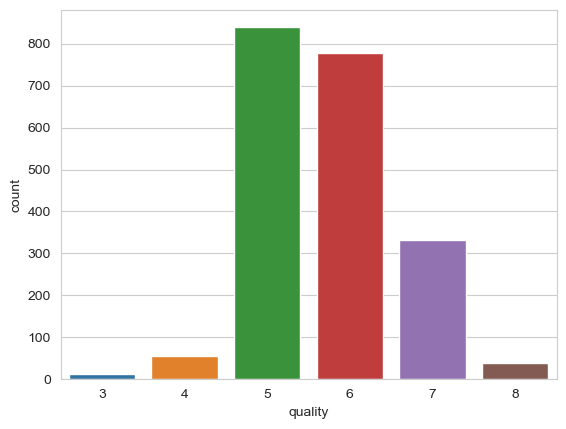

In [13]:
sns.countplot(train, x = 'quality')
plt.show()

In [14]:
def violin_plot(df):
    data = df.drop(columns='quality')
    num_cols = len(data.columns)
    
    plt.figure(figsize = (10, num_cols * 3))
    for i, column in enumerate(data.columns):
        plt.subplot(num_cols, 1, i+1)
        sns.violinplot(data = df, x = 'quality', y = column)
        plt.title(f'{column}')
        plt.xlabel(column)
        plt.ylabel('Values')
        
    plt.tight_layout()
    plt.show()

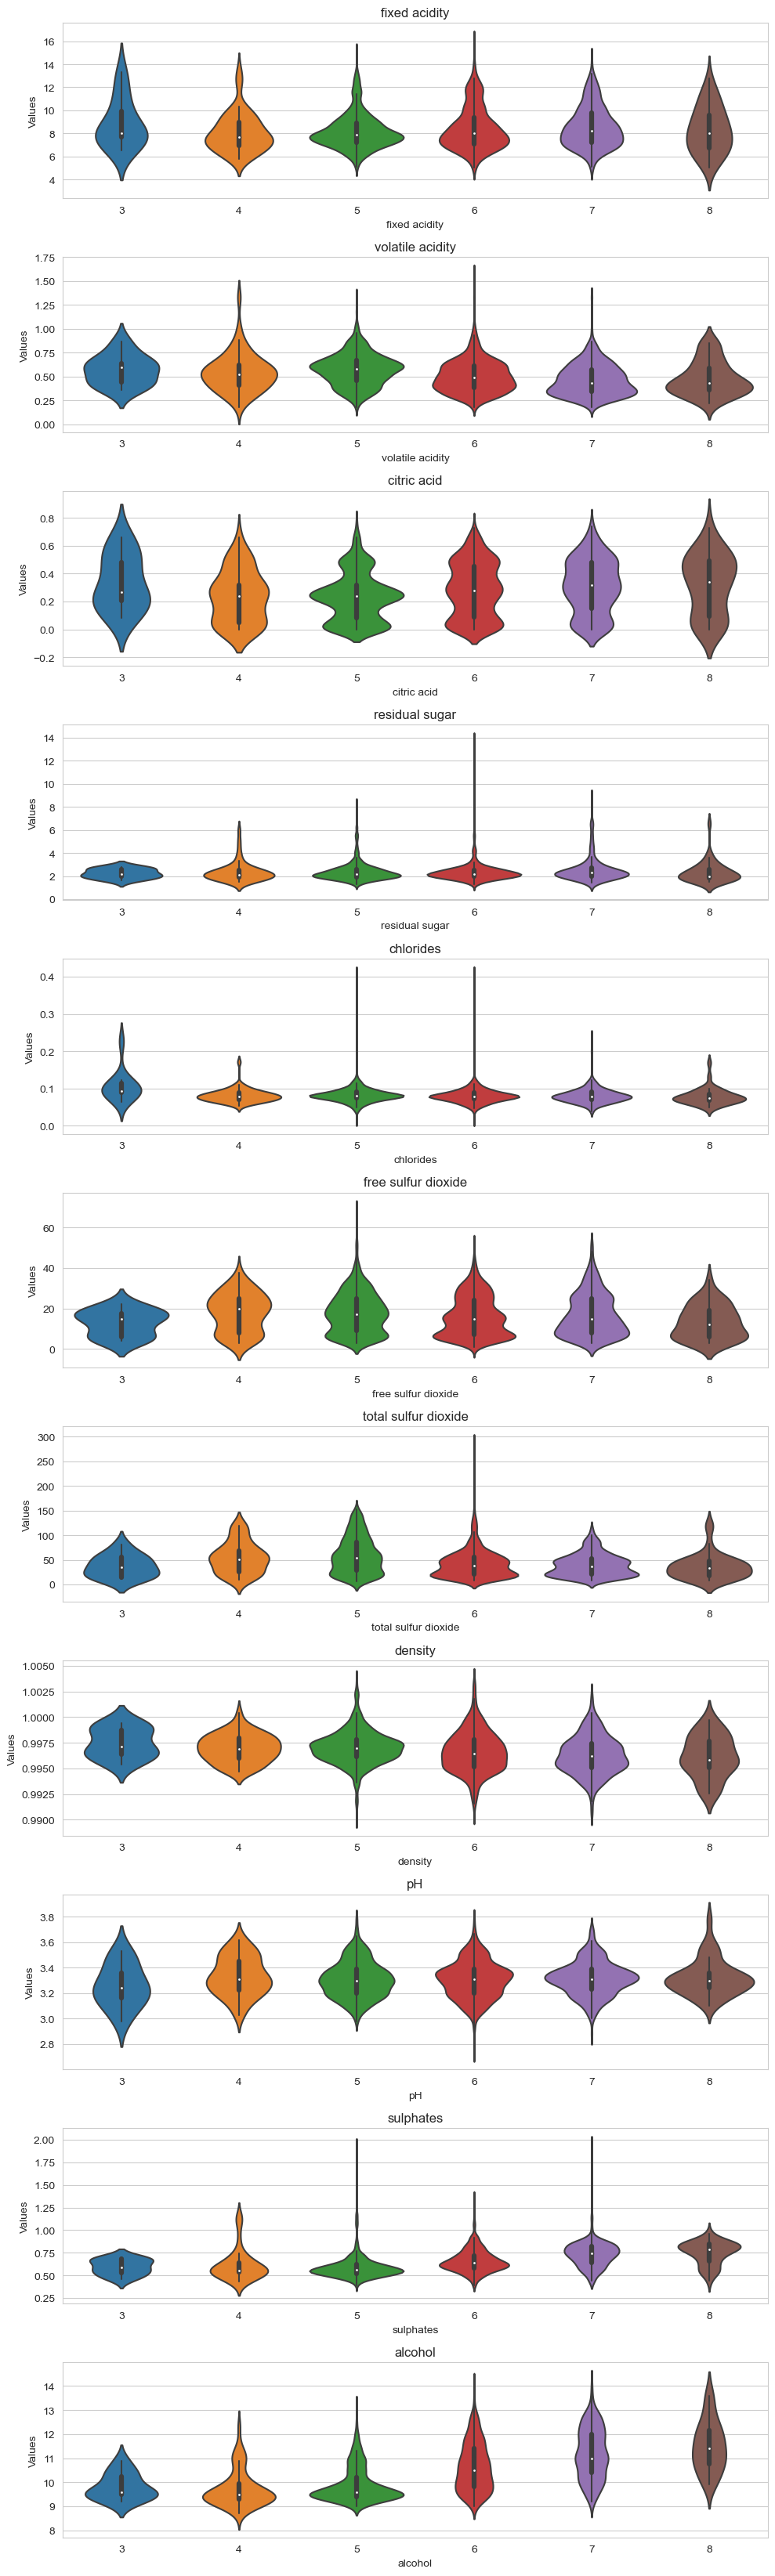

In [15]:
violin_plot(train)

In [16]:
copy_df = train.copy()

In [17]:
# Cleaning column names and creating new features
def feat_eng(df):
    df.columns = df.columns.str.replace(' ', '_')
    df['total_acidity'] = df['fixed_acidity'] + df['volatile_acidity'] + df['citric_acid']
    df['acidity_to_pH_ratio'] = df['total_acidity'] / df['pH']
    df['free_sulfur_dioxide_to_total_sulfur_dioxide_ratio'] = df['free_sulfur_dioxide'] / df['total_sulfur_dioxide']
    df['alcohol_to_acidity_ratio'] = df['alcohol'] / df['total_acidity']
    df['residual_sugar_to_citric_acid_ratio'] = df['residual_sugar'] / df['citric_acid']
    df['alcohol_to_density_ratio'] = df['alcohol'] / df['density']
    df['total_alkalinity'] = df['pH'] + df['alcohol']
    df['total_minerals'] = df['chlorides'] + df['sulphates'] + df['residual_sugar']
    
    # Cleaning inf or null values that may result from the operations above
    df = df.replace([np.inf, -np.inf], 0)
    df = df.dropna()
    
    return df

In [18]:
copy_df = feat_eng(copy_df)

In [19]:
X = copy_df.drop(columns = 'quality')
y = copy_df['quality']

In [20]:
has_negatives = np.any(X <= 0)

if has_negatives:
    print("There are negative values in the data.")
else:
    print("There are no negative values in the data.")

There are negative values in the data.


## Transformation: transform the data into normalization

#### Resource: https://flag-editors.medium.com/機器學習動手做lesson-3-利用quantile-transform讓資料分布趨近於常態分布-cb9eb793e013

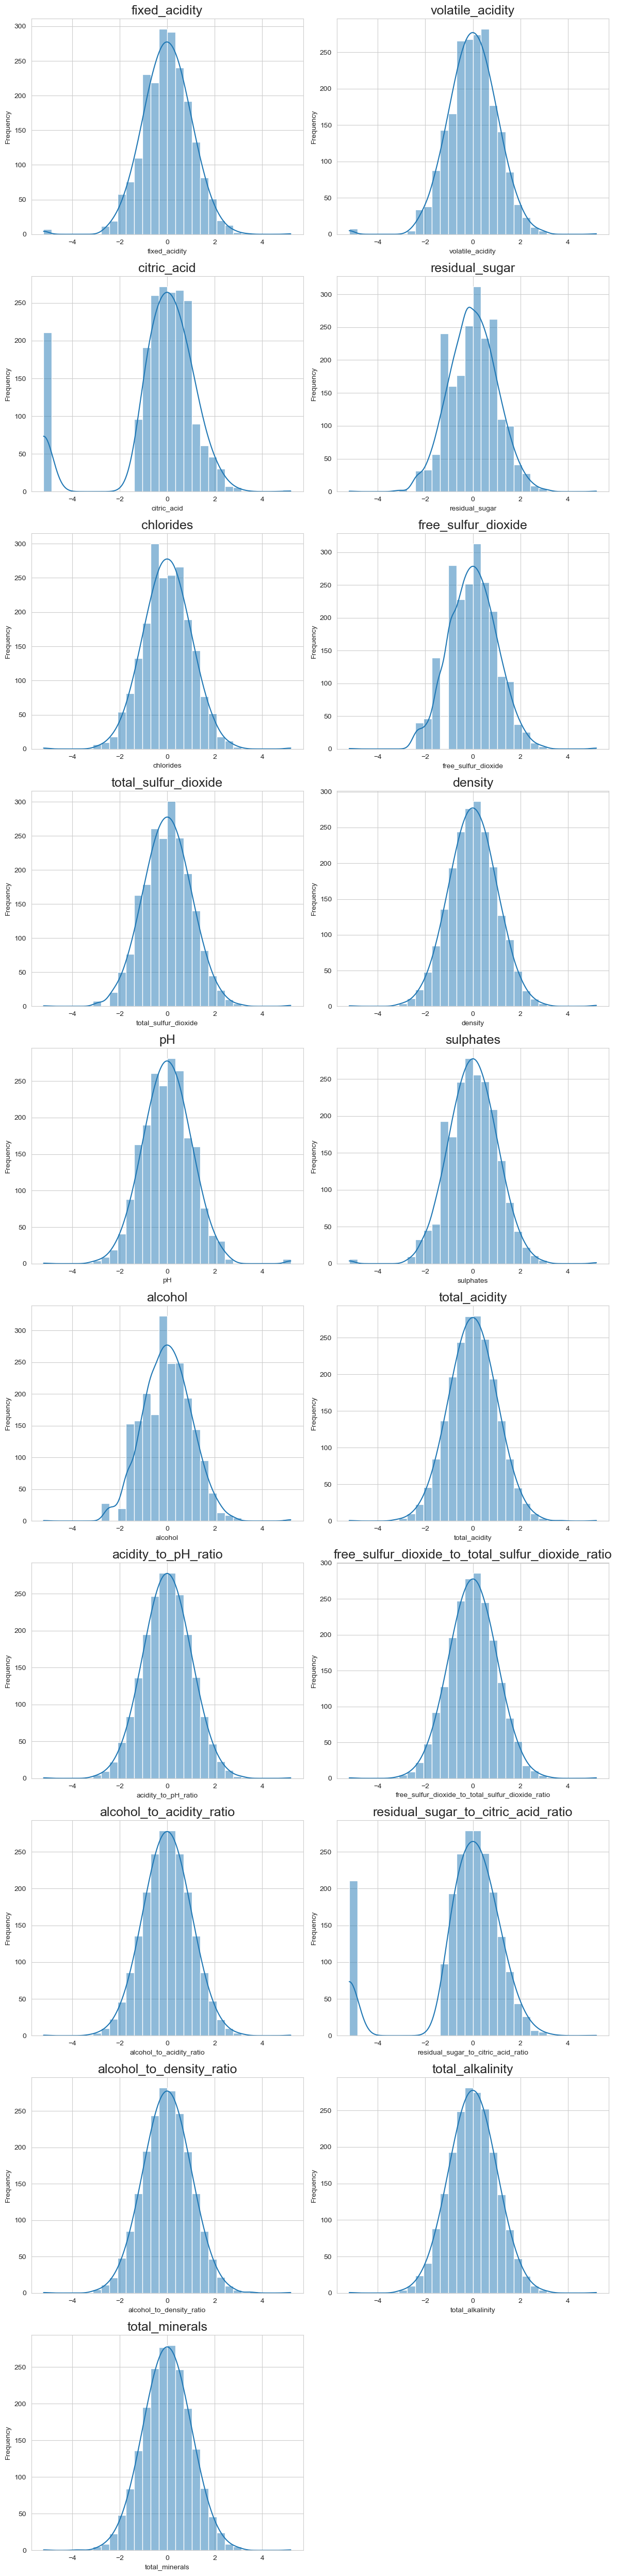

In [21]:
transformer = QuantileTransformer(output_distribution='normal')
X_transformed = transformer.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)
plot_histplot(X_transformed)

## Standardizing

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)
X_scaled = pd.DataFrame(X_scaled, columns=X_transformed.columns)

## Features Selection

#### Rsource: https://ithelp.ithome.com.tw/articles/10232299
#### Most of RFECV is use for clustering

In [23]:
seed = 42

In [24]:
def quadratic_weighted_kappa(y_true, y_pred):
    '''
    This function returns the evaluation metric of this competition
    '''
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

In [25]:
cv = StratifiedKFold(n_splits = 5,shuffle = True, random_state = seed)
cv_splits = list(cv.split(X,y))

In [26]:
estimator = RandomForestClassifier(random_state=seed)
rfe = RFECV(estimator=estimator, cv=cv, scoring=make_scorer(quadratic_weighted_kappa))
rfe.fit(X, y)

selected_features = []

for i, feature in enumerate(X_scaled.columns):
    if rfe.support_[i]:
        selected_features.append(feature)

print(f'{len(selected_features)} features selected out of {len(X_scaled.columns)}.')
print(f'\nSelected Features: \n')
for feature in selected_features:
    print(feature)

16 features selected out of 19.

Selected Features: 

volatile_acidity
citric_acid
chlorides
total_sulfur_dioxide
density
pH
sulphates
alcohol
total_acidity
acidity_to_pH_ratio
free_sulfur_dioxide_to_total_sulfur_dioxide_ratio
alcohol_to_acidity_ratio
residual_sugar_to_citric_acid_ratio
alcohol_to_density_ratio
total_alkalinity
total_minerals


In [27]:
X_scaled = X_scaled[selected_features]
X_scaled.head(5)

,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,total_acidity,acidity_to_pH_ratio,free_sulfur_dioxide_to_total_sulfur_dioxide_ratio,alcohol_to_acidity_ratio,residual_sugar_to_citric_acid_ratio,alcohol_to_density_ratio,total_alkalinity,total_minerals
0,-0.076330,0.508947,-0.553589,-0.142310,-0.566442,0.155189,0.953842,1.406556,0.079472,-0.009198,2.329995,0.777777,-0.019915,1.407556,1.421266,0.183914
1,-1.361933,1.730563,0.770374,0.745626,1.004572,0.099862,0.410132,2.038955,0.816195,0.701172,0.492392,0.338287,-0.457675,1.941568,2.034824,0.216886
2,-0.023067,-0.351927,-1.336598,-1.626645,-0.042952,1.314119,0.755430,0.798575,-0.917450,-1.087849,-0.751248,1.198958,1.036371,0.791176,0.925482,-0.095595
3,1.770765,0.067305,0.377988,0.657764,0.310036,-0.708869,-0.868483,-0.301802,0.263831,0.321004,-1.583415,-0.375436,0.506149,-0.316459,-0.439173,0.493229
4,-0.857373,0.321729,-0.025974,0.049100,-1.420972,-0.708869,2.997112,-0.754706,0.247136,0.304314,-1.022301,-0.501615,0.202630,-0.601954,-0.952784,1.189350


## Clustering: using K-Means
#### Resource: https://medium.com/@pahome.chen/clustering決定分群數的方法-abedc1d81ccb
#### Resource: https://builtin.com/data-science/elbow-method

In [28]:
from yellowbrick.cluster import SilhouetteVisualizer

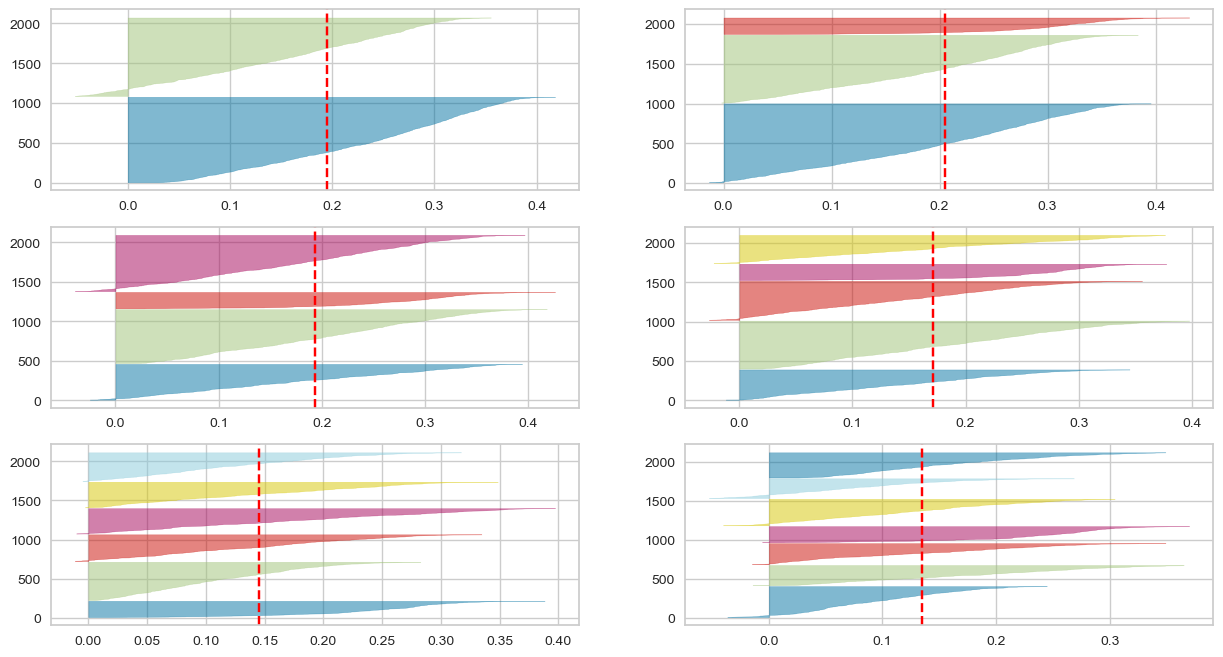

In [29]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 100, random_state = 42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_scaled) 

1. For a particular K, all the clusters should have a Silhouette score greater than the average score of the data set represented by the red-dotted line. The x-axis represents the Silhouette score. All of the cluster have a Silhouette score greater than the average.

2. There shouldn’t be wide fluctuations in the size of the clusters. The width of the clusters represents the number of data points, so I eliminate K = 2 and K = 3 and choose K = 4

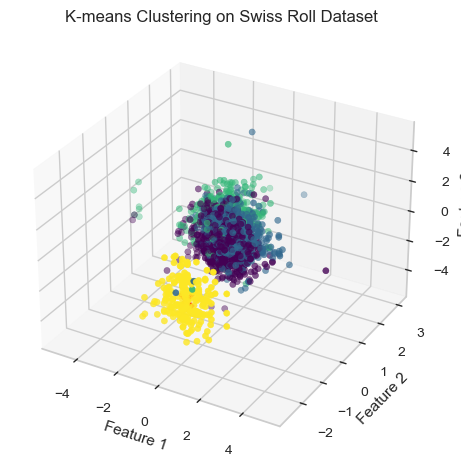

In [30]:
#Resource: https://vbatopandas.blogspot.com/2023/12/k-means-clustering-3d-plot-swiss-roll.html
## K-means using k = 4
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X_scaled)
labels = kmeans.labels_
# Plot the data points and their cluster assignments
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled.iloc[:, 0].values, X_scaled.iloc[:, 1].values, X_scaled.iloc[:, 2].values, c = labels, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           marker='x', color='red', s=100 , linewidths=3)

ax.set_title("K-means Clustering on Swiss Roll Dataset")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()

import plotly.graph_objs as go  #for 3D plot
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

## K-means using k = 4
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

## 3D plot 
Scene = dict(xaxis = dict(title  = 'sepal_length -->'),yaxis = dict(title  = 'sepal_width--->'),zaxis = dict(title  = 'petal_length-->'))

labels = kmeans.labels_
trace = go.Scatter3d(x = X_scaled.iloc[:, 0].values, y = X_scaled.iloc[:, 1].values, z = X_scaled.iloc[:, 2].values, mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

## Modeling 

### PipeLine First

In [31]:
# Cleaning and creating features
def feat_eng(df):
    df.columns = df.columns.str.replace(' ', '_')
    df['total_acidity'] = df['fixed_acidity'] + df['volatile_acidity'] + df['citric_acid']
    df['acidity_to_pH_ratio'] = df['total_acidity'] / df['pH']
    df['free_sulfur_dioxide_to_total_sulfur_dioxide_ratio'] = df['free_sulfur_dioxide'] / df['total_sulfur_dioxide']
    df['alcohol_to_acidity_ratio'] = df['alcohol'] / df['total_acidity']
    df['residual_sugar_to_citric_acid_ratio'] = df['residual_sugar'] / df['citric_acid']
    df['alcohol_to_density_ratio'] = df['alcohol'] / df['density']
    df['total_alkalinity'] = df['pH'] + df['alcohol']
    df['total_minerals'] = df['chlorides'] + df['sulphates'] + df['residual_sugar']

    df = df.replace([np.inf, -np.inf], 0)
    df = df.dropna()
    
    df = df[selected_features]
    
    return df

In [32]:
# Applying QuantileTransformer to change the distribution to a gaussian-like distribution
class CustomQuantileTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, random_state = None):
        self.random_state = random_state
        self.quantile_transformer = QuantileTransformer(output_distribution='normal', random_state = self.random_state)

    def fit(self, X_train, y=None):
        self.quantile_transformer.fit(X_train)
        return self

    def transform(self, X):
        X_transformed = self.quantile_transformer.transform(X)
        X = pd.DataFrame(X_transformed, columns=X.columns)
        return X

In [33]:
# Applying StandardScaler to bring every feature to the same scale
class CustomStandardScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self, X_train, y=None):
        self.scaler.fit(X_train)
        return self

    def transform(self, X):
        X_transformed = self.scaler.transform(X)
        X = pd.DataFrame(X_transformed, columns=X.columns)
        return X

In [34]:
# Applying KMeans clustering with n_clusters = 4

class KMeansTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, n_clusters=4, random_state=seed):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=self.random_state)
   
    def fit(self, X_train, y=None):
        self.kmeans.fit(X_train)
        return self
    
    def transform(self, X):
        X_clustered = pd.DataFrame(X.copy())
        cluster_labels = self.kmeans.predict(X)
        X_clustered['Cluster'] = cluster_labels
        return X_clustered

In [35]:
pipeline = Pipeline([
    ('Feature Engineering', FunctionTransformer(feat_eng)),
    ('Transforming Distribution', CustomQuantileTransformer()),
    ('Standard Scaler', CustomStandardScaler()),
    ('Clustering', KMeansTransformer()),
    ('Model', None)
])

In [36]:
pipeline #Visualization

Pipeline(steps=[('Feature Engineering',
                 FunctionTransformer(func=<function feat_eng at 0x158ba0c10>)),
                ('Transforming Distribution', CustomQuantileTransformer()),
                ('Standard Scaler', CustomStandardScaler()),
                ('Clustering', KMeansTransformer()), ('Model', None)])

### Selecting Models

In [37]:
def X_y_split(df, target_variable):
    X, y = df.drop([target_variable], axis = 1), df[target_variable] 
    return X, y

In [38]:
X, y = X_y_split(train, 'quality') # Splitting original data

In [39]:
# Defining CV strategy
cv = StratifiedKFold(n_splits = 5,shuffle = True, random_state = seed)
cv_splits = list(cv.split(X,y))

#### A score of 1 implies perfect agreement between the raters, while a score of 0 indicates that the agreement is no better than what would be expected by random chance. Negative values suggest that the agreement is even worse than random.

In [40]:
classifiers = [
    ('CatBoost', CatBoostClassifier(random_state = seed, verbose = False)),
    ('XGboost', XGBClassifier(random_state = seed)),
    ('Ada Boost', AdaBoostClassifier(random_state = seed)),
    ('Histogram-based Gradient Boosting', HistGradientBoostingClassifier(random_state = seed))
]

#### I make the XGBoost viable

In [41]:
from sklearn.preprocessing import LabelEncoder
print('\nCross-Validation:')
for j, (name, clf) in enumerate(classifiers):
    scores = []
    r2_scores = []
    pipeline.set_params(Model = clf)
    
    print('\n')
    print(f'\n{name} Classifier:\n')
    
    for i, (train_index, val_index) in enumerate(cv_splits):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        if name == 'XGboost':
            label_encoder = LabelEncoder()

            # Fit and transform on y_train
            y_train = label_encoder.fit_transform(y_train)
            y_val = label_encoder.fit_transform(y_val)

        pipeline.fit(X_train, y_train)   
        y_pred = pipeline.predict(X_val)

        kappa = cohen_kappa_score(y_val, y_pred, weights = 'quadratic')

        print(f'Fold {i + 1}:\n')
        print(f'  Quadratic Weighted Kappa = {kappa:.4f}')
        
        scores.append(kappa)

        print('===================================================')

    if i == len(cv_splits) - 1:
        mean_score = np.mean(scores)
        fold_std = np.std(scores)

        print(f'\n  Mean Quadratic Weighted Kappa = = {mean_score:.4f} \u00B1 {fold_std:.4f}')


Cross-Validation:



CatBoost Classifier:

Fold 1:

  Quadratic Weighted Kappa = 0.4920
Fold 2:

  Quadratic Weighted Kappa = 0.5054
Fold 3:

  Quadratic Weighted Kappa = 0.4453
Fold 4:

  Quadratic Weighted Kappa = 0.4517
Fold 5:

  Quadratic Weighted Kappa = 0.4991

  Mean Quadratic Weighted Kappa = = 0.4787 ± 0.0251



XGboost Classifier:

Fold 1:

  Quadratic Weighted Kappa = 0.4684
Fold 2:

  Quadratic Weighted Kappa = 0.4824
Fold 3:

  Quadratic Weighted Kappa = 0.4293
Fold 4:

  Quadratic Weighted Kappa = 0.4648
Fold 5:

  Quadratic Weighted Kappa = 0.4868

  Mean Quadratic Weighted Kappa = = 0.4663 ± 0.0203



Ada Boost Classifier:

Fold 1:

  Quadratic Weighted Kappa = 0.3442
Fold 2:

  Quadratic Weighted Kappa = 0.3848
Fold 3:

  Quadratic Weighted Kappa = 0.3463
Fold 4:

  Quadratic Weighted Kappa = 0.4663
Fold 5:

  Quadratic Weighted Kappa = 0.4556

  Mean Quadratic Weighted Kappa = = 0.3994 ± 0.0524



Histogram-based Gradient Boosting Classifier:

Fold 1:

  Quadratic W

#### As a result, CatBoost still get the best score

## Now let tuning the hypramater

In [42]:
def objective2(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5, step=0.01),
        'iterations': trial.suggest_int('iterations', 100, 1000, step=50),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0, step=0.1),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 10, step=0.1),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 50),
        'random_strength': trial.suggest_float('random_strength', 0.1, 10, step=0.1),
        'verbose': False,
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bernoulli', 'MVS']),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'leaf_estimation_method': trial.suggest_categorical('leaf_estimation_method', ['Newton', 'Gradient']),
        'eval_metric': 'Accuracy'
    }
    pipeline.set_params(Model = CatBoostClassifier(**params, random_state = seed))
    scores = []

In [43]:
def objective2(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5, step=0.01),
        'iterations': trial.suggest_int('iterations', 100, 1000, step=50),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0, step=0.1),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 10, step=0.1),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 50),
        'random_strength': trial.suggest_float('random_strength', 0.1, 10, step=0.1),
        'verbose': False,
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bernoulli', 'MVS']),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'leaf_estimation_method': trial.suggest_categorical('leaf_estimation_method', ['Newton', 'Gradient']),
        'eval_metric': 'Accuracy'
    }
    
    pipeline.set_params(Model = CatBoostClassifier(**params, random_state = seed))
    scores = []
    
    for i, (train_index, val_index) in enumerate(cv_splits):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_val)
        
        kappa = cohen_kappa_score(y_val, y_pred, weights = 'quadratic')
        
        print(f'Fold {i + 1}:\n')
        print(f'  Quadratic Weighted Kappa = {kappa:.4f}\n')
        
        scores.append(kappa)
    
    if i == len(cv_splits) - 1:
        mean_score = np.mean(scores)
        
        print('* * * * * * * * * * * * * * * * * * * * * * * * * * * *\n')
        print(f'  Mean Quadratic Weighted Kappa: {mean_score:.4f}\n')
        print('\n')
        
    return mean_score        
         

study2 = optuna.create_study(direction = 'maximize')
study2.optimize(objective2, n_trials = 1, show_progress_bar = True)
# I only try 1 time because it took too too too long

[I 2024-01-22 15:46:10,350] A new study created in memory with name: no-name-89539a3b-8400-474d-bab3-376ef4bc5712


  0%|          | 0/1 [00:00<?, ?it/s]

Fold 1:

  Quadratic Weighted Kappa = 0.4519

Fold 2:

  Quadratic Weighted Kappa = 0.4699

Fold 3:

  Quadratic Weighted Kappa = 0.4396

Fold 4:

  Quadratic Weighted Kappa = 0.4672

Fold 5:

  Quadratic Weighted Kappa = 0.4133

* * * * * * * * * * * * * * * * * * * * * * * * * * * *

  Mean Quadratic Weighted Kappa: 0.4484



[I 2024-01-22 15:46:13,129] Trial 0 finished with value: 0.44839470859775393 and parameters: {'learning_rate': 0.42000000000000004, 'iterations': 200, 'max_depth': 5, 'subsample': 0.4, 'l2_leaf_reg': 2.9000000000000004, 'min_data_in_leaf': 21, 'random_strength': 3.5000000000000004, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'Depthwise', 'leaf_estimation_method': 'Newton'}. Best is trial 0 with value: 0.44839470859775393.


In [44]:
best_params2 = study2.best_params
best_rmse_score2 = study2.best_value


print(f'\nCatBoost Regressor:\n')
print(f'\n Best RMSE score = {best_rmse_score2} \n')
print(f'\n Best Params = {best_params2} \n')


CatBoost Regressor:


 Best RMSE score = 0.44839470859775393 


 Best Params = {'learning_rate': 0.42000000000000004, 'iterations': 200, 'max_depth': 5, 'subsample': 0.4, 'l2_leaf_reg': 2.9000000000000004, 'min_data_in_leaf': 21, 'random_strength': 3.5000000000000004, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'Depthwise', 'leaf_estimation_method': 'Newton'} 



In [45]:
# Setting pipeline with Tuned CatBoost Model
pipeline.set_params(Model = CatBoostClassifier(**best_params2,random_state = seed, verbose = False))
pipeline

Pipeline(steps=[('Feature Engineering',
                 FunctionTransformer(func=<function feat_eng at 0x158ba0c10>)),
                ('Transforming Distribution', CustomQuantileTransformer()),
                ('Standard Scaler', CustomStandardScaler()),
                ('Clustering', KMeansTransformer()),
                ('Model',
                 <catboost.core.CatBoostClassifier object at 0x1584d9690>)])

In [46]:
print('\nTuned CatBoostClassifier Cross-Validation:')
scores = []
feature_importance = []
print('\n')

for i, (train_index, val_index) in enumerate(cv_splits):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
        
    kappa = cohen_kappa_score(y_val, y_pred, weights = 'quadratic')
        
    print(f'Fold {i + 1}:\n')
    print(f'  Quadratic Weighted Kappa = {kappa:.4f}')
        
    scores.append(kappa)
    feature_importance.append(pipeline[-1].feature_importances_)
        
    print('===================================================')
    
    if i == len(cv_splits) - 1:
        mean_score = np.mean(scores)
        fold_std = np.std(scores)
        
        print(f'\n  Mean Quadratic Weighted Kappa = = {mean_score:.4f} \u00B1 {fold_std:.4f}')


Tuned CatBoostClassifier Cross-Validation:


Fold 1:

  Quadratic Weighted Kappa = 0.4519
Fold 2:

  Quadratic Weighted Kappa = 0.4699
Fold 3:

  Quadratic Weighted Kappa = 0.4396
Fold 4:

  Quadratic Weighted Kappa = 0.4672
Fold 5:

  Quadratic Weighted Kappa = 0.4133

  Mean Quadratic Weighted Kappa = = 0.4484 ± 0.0207


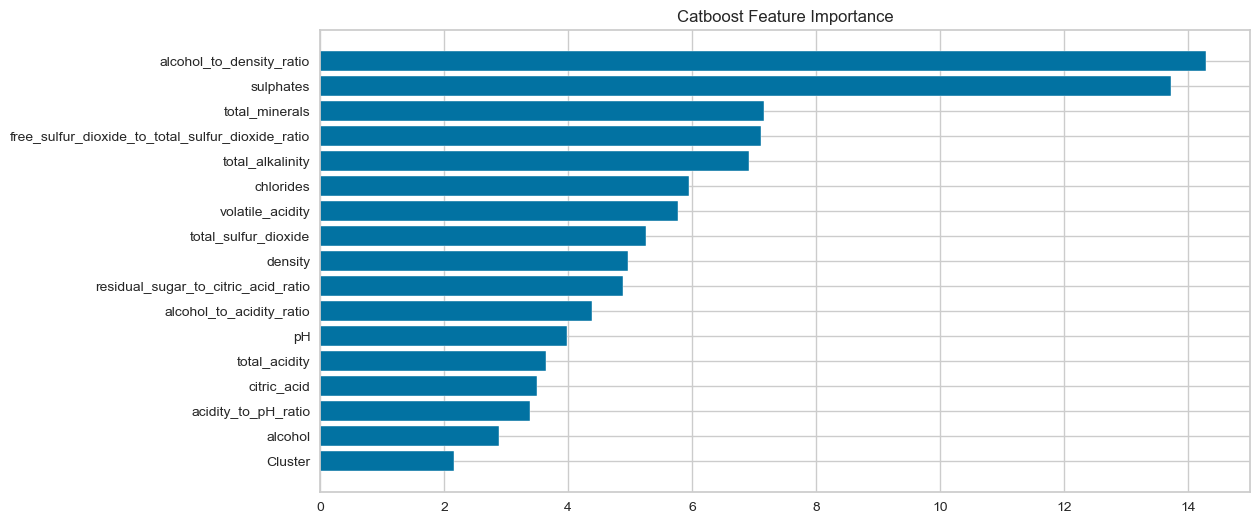

In [47]:
no_model_pipeline = Pipeline(pipeline.steps[:-1])
feat_names = X.copy()
feat_names = no_model_pipeline.fit_transform(feat_names)
feature_names = feat_names.columns
mean_feature_importance = np.mean(feature_importance, axis=0)

sorted_indices = np.argsort(mean_feature_importance)
mean_feature_importance = mean_feature_importance[sorted_indices]
feature_names = feature_names[sorted_indices]

fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_indices)), mean_feature_importance, align = 'center')
plt.yticks(range(len(sorted_indices)), np.array(feature_names))
plt.title('Catboost Feature Importance')

plt.show()

In [48]:
test_id = test['Id']
test_id

0       2056
1       2057
2       2058
3       2059
4       2060
        ... 
1367    3423
1368    3424
1369    3425
1370    3426
1371    3427
Name: Id, Length: 1372, dtype: int64

In [49]:
test = test.drop(columns = 'Id')

In [50]:
pipeline

Pipeline(steps=[('Feature Engineering',
                 FunctionTransformer(func=<function feat_eng at 0x158ba0c10>)),
                ('Transforming Distribution', CustomQuantileTransformer()),
                ('Standard Scaler', CustomStandardScaler()),
                ('Clustering', KMeansTransformer()),
                ('Model',
                 <catboost.core.CatBoostClassifier object at 0x1584d9690>)])

In [51]:
# Predicting with the pipeline
y_pred = pipeline.predict(test)
y_pred # Visualizing predictions

array([[5],
       [5],
       [6],
       ...,
       [5],
       [5],
       [6]])

In [52]:
# Creating a submission dataframe
predictions = pd.DataFrame({
    'id': test_id,
    'quality': np.squeeze(y_pred)
})
predictions

,id,quality
0,2056,5
1,2057,5
2,2058,6
3,2059,6
4,2060,6
...,...,...
1367,3423,6
1368,3424,7
1369,3425,5
1370,3426,5


In [53]:
predictions.to_csv('submission.csv', index = False) # submitting dataframe

# *Deploying Pipeline*